# MALARIA CELL DETECTOR

### IMPORTING LIBRARIES

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.metrics import confusion_matrix,accuracy_score
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers,activations
from keras.models import load_model
from keras.preprocessing import image

%matplotlib inline

-----------------------------------------------------------------------------------------------------------------

## SETTING THE TRAIN AND TEST PATH

In [4]:
train_path = '/home/sj/Desktop/DATASETS/00 CNN/malaria cell images dataset/train'

In [5]:
test_path = '/home/sj/Desktop/DATASETS/00 CNN/malaria cell images dataset/test'

## LISTING THE FOLDERS IN TRAIN AND TEST PATH

In [6]:
os.listdir(train_path)

['uninfected', 'parasitized']

In [7]:
os.listdir(test_path)

['uninfected', 'parasitized']

------------------------------------------------------------------------------------------------------------------

## Displaying Uninfected Cell

In [10]:
uninfected_1 = imread(train_path + '/uninfected' + '/C82P43ThinF_IMG_20150817_124418_cell_138.png')

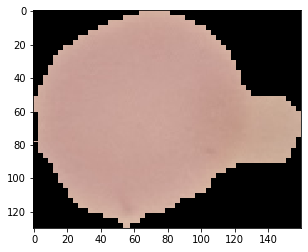

In [11]:
plt.imshow(uninfected_1)

## Displaying Infected Cell

In [12]:
parasitized_1 = imread(train_path + '/parasitized' + '/C116P77ThinF_IMG_20150930_171448_cell_89.png')

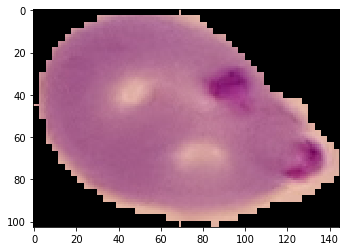

In [13]:
plt.imshow(parasitized_1)

### LENGTH OF TRAIN SET AND TEST SET

In [14]:
print('parasitized training set images' + ' -- ' + str(len(os.listdir(train_path+'/parasitized'))))
print('uninfected training set images' + ' -- ' + str(len(os.listdir(train_path+'/uninfected'))))

parasitized training set images -- 12480
uninfected training set images -- 12480


In [15]:
print('parasitized test set images' + ' -- ' + str(len(os.listdir(test_path+'/parasitized'))))
print('uninfected test set images' + ' -- ' + str(len(os.listdir(test_path+'/uninfected'))))

parasitized test set images -- 1300
uninfected test set images -- 1300


######  OUR DATASET IS BALANCED

------------------------------------------------------------------------------------------------------------------

### FINDING THE RIGHT DIMENSIONS FOR RESHAPING OUR IMAGES

#### DIMENSIONS FOR PARASITIZED CELL

In [16]:
dim1_parasitized = []
dim2_parasitized = []

for image_file in os.listdir(test_path + '/parasitized' ):
    img = imread(test_path + '/parasitized/' + image_file)
    d1,d2,d3 = img.shape
    
    dim1_parasitized.append(d1)
    dim2_parasitized.append(d2)

In [17]:
np.mean(dim1_parasitized)

134.64307692307693

In [18]:
np.mean(dim2_parasitized)

133.31846153846155

Text(0, 0.5, 'dimension 2 of parasitized cell')

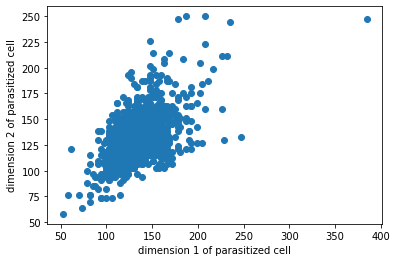

In [19]:
plt.scatter(dim1_parasitized,dim2_parasitized)
plt.xlabel('dimension 1 of parasitized cell')
plt.ylabel('dimension 2 of parasitized cell')

------------------------------------------------------------------------------------------------------------------

#### DIMENSIONS FOR UNINFECTED CELL

In [20]:
dim1_uninfected = []
dim2_uninfected = []

for image_file in os.listdir(test_path + '/uninfected' ):
    img = imread(test_path + '/uninfected/' + image_file)
    d1_u,d2_u,d3_u = img.shape
    
    dim1_uninfected.append(d1_u)
    dim2_uninfected.append(d2_u)

In [21]:
np.mean(dim1_uninfected)

130.92538461538462

In [22]:
np.mean(dim2_uninfected)

130.75

Text(0, 0.5, 'dimension 2 of uninfected cell')

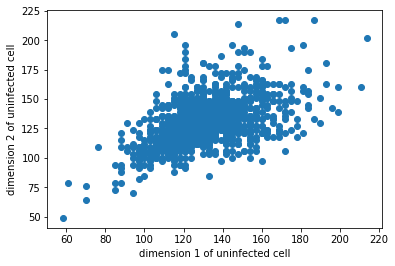

In [23]:
plt.scatter(dim1_uninfected,dim2_uninfected)
plt.xlabel('dimension 1 of uninfected cell')
plt.ylabel('dimension 2 of uninfected cell')

------------------------------------------------------------------------------------------------------------------

## DATA  AUGMENTATION 

#### TRAINING SET IMAGE GENERATOR

In [24]:
image_gen_train = ImageDataGenerator(rotation_range = 20,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1, 
                                     shear_range=0.1, 
                                     zoom_range=0.1,
                                    rescale=1/255,
                                    fill_mode='nearest',
                                    horizontal_flip=True)

In [25]:
train_generator = image_gen_train.flow_from_directory(train_path,
                                    target_size=(130,130),
                                    batch_size=32,
                                    color_mode='rgb',
                                    class_mode='binary')

Found 24958 images belonging to 2 classes.


------------------------------------------------------------------------------------------------------------------

#### TEST SET IMAGE GENERATOR

In [26]:
image_gen_test = ImageDataGenerator(rescale = 1/255)

In [27]:
test_generator = image_gen_test.flow_from_directory(test_path,
                                    target_size=(130,130),
                                    batch_size=32,
                                    color_mode='rgb',
                                    class_mode='binary',
                                    shuffle = False)

Found 2600 images belonging to 2 classes.


------------------------------------------------------------------------------------------------------------------

## BUILDING MODEL

In [28]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), input_shape = (130,130,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.4),
    layers.Dense(1, activation = 'sigmoid')
])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [63]:
model.fit_generator(train_generator, epochs=20, validation_data=test_generator)


Epoch 1/20
780/780 [==============================] - 600s 770ms/step - loss: 0.6650 - accuracy: 0.5961 - val_loss: 0.6173 - val_accuracy: 0.5750
Epoch 2/20
780/780 [==============================] - 562s 721ms/step - loss: 0.6729 - accuracy: 0.5873 - val_loss: 0.8073 - val_accuracy: 0.6073
Epoch 3/20
780/780 [==============================] - 571s 731ms/step - loss: 0.3813 - accuracy: 0.8428 - val_loss: 0.4131 - val_accuracy: 0.9223
Epoch 4/20
780/780 [==============================] - 571s 732ms/step - loss: 0.2097 - accuracy: 0.9315 - val_loss: 0.4452 - val_accuracy: 0.9300
Epoch 5/20
780/780 [==============================] - 563s 722ms/step - loss: 0.1964 - accuracy: 0.9378 - val_loss: 0.1418 - val_accuracy: 0.9373
Epoch 6/20
780/780 [==============================] - 624s 800ms/step - loss: 0.1730 - accuracy: 0.9465 - val_loss: 0.0350 - val_accuracy: 0.9412
Epoch 7/20
780/780 [==============================] - 662s 849ms/step - loss: 0.1677 - accuracy: 0.9484 - val_loss: 0.7249 

------------------------------------------------------------------------------------------------------------------

###### SAVING MODEL

In [ ]:
model.save('malaria cell detection model.h5')

###### LOADING MODEL

In [32]:
model = load_model('malaria cell detection model.h5')   #LOADING THE ABOVE TRAINED MODEL ONLY !!

###### LOSS AND ACCURACY OF OUR MODEL

In [131]:
print(model.metrics_names)
print(model.evaluate_generator(test_generator))

['loss', 'accuracy']
[0.05528785288333893, 0.947692334651947]


------------------------------------------------------------------------------------------------------------------

### PREDICTING ON TEST SET

In [132]:
predicted_probabilities = model.predict_generator(test_generator)
predicted_classes = predicted_probabilities > 0.5

###### TEST ACCURACY SCORE

In [133]:
accuracy_score(test_generator.classes,predicted_classes)

0.9488461538461539

###### CONFUSION MATRIX

In [134]:
confusion_matrix(test_generator.classes, predicted_classes)

array([[1238,   62],
       [  71, 1229]])

In [168]:
test_generator.class_indices

{'parasitized': 0, 'uninfected': 1}

------------------------------------------------------------------------------------------------------------------

### PREDICTING ON CUSTOM IMAGES

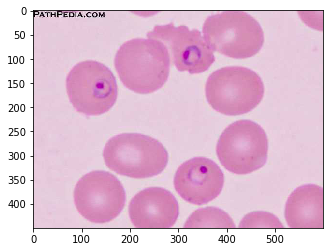

In [161]:
plt.imshow(imread('/home/sj/Desktop/malaria custom image.jpeg'))   #CUSTOM PARASITIZED IMAGE(NOT IN OUR DATA) 

In [162]:
new_image_pil = image.load_img('/home/sj/Desktop/malaria custom image.jpeg',target_size=(130,130,3))    #IMAGE IS IN PIL FORMAT

In [163]:
new_image_array = image.img_to_array(new_image_pil)    #CONVERTING PIL TO NUMPY ARRAY FOR PREDICTING 

In [164]:
new_image = np.expand_dims(new_image_array, axis=0)

In [165]:
new_image.shape   #EXPANDING DIMENSIONS TO FIT IN MODEL

(1, 130, 130, 3)

------------------------------------------------------------------------------------------------------------------

In [175]:
prediction_new = model.predict(new_image)

if prediction_new[0] == 0:
    print('THE CELL IS PARASITIZED')
else:
    print('THE CELL IS INFECTED')

THE CELL IS PARASITIZED


#### OUR MODEL PREDICTED CORRECTLY ON THE NEW CUSTOM IMAGE

### THEREFORE THE MODEL HAS A TEST AS WELL AS TRAIN ACCURACY APPROXIMATELY OF 95% USING CNN AND OTHER TECHNIQUES.